In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# 1. Loading the data

In [2]:
# Attempting to load the dataset using 'ISO-8859-1' encoding
spotify_data = pd.read_csv('./data/spotify-2023.csv', encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
#spotify_data.head()


# 2. Some basic statistics

In [3]:
# Getting a summary of the data
#data_summary = spotify_data.describe(include='all')

# Displaying the data summary
#data_summary

In [4]:
# Checking for missing values in the dataset
#missing_values = spotify_data.isnull().sum()

# Displaying the count of missing values for each column
#missing_values

# 3. Distribution of percentage features

In [5]:
""" # Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Creating a list of features to visualize
features_to_visualize = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(12, 15))

# Plotting the distribution for each feature
for i, feature in enumerate(features_to_visualize):
    sns.histplot(spotify_data[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show() """

' # Setting the aesthetics for the plots\nsns.set_style("whitegrid")\n\n# Creating a list of features to visualize\nfeatures_to_visualize = [\'danceability_%\', \'energy_%\', \'valence_%\', \'acousticness_%\', \'instrumentalness_%\', \'liveness_%\', \'speechiness_%\']\n\n# Setting up the figure and axes\nfig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(12, 15))\n\n# Plotting the distribution for each feature\nfor i, feature in enumerate(features_to_visualize):\n    sns.histplot(spotify_data[feature], ax=axes[i], bins=30, kde=True)\n    axes[i].set_title(f\'Distribution of {feature}\', fontsize=14)\n    axes[i].set_xlabel(feature)\n    axes[i].set_ylabel(\'Frequency\')\n\nplt.tight_layout()\nplt.show() '

# 4. The top 10 songs based on their presence in Spotify playlists

In [6]:
""" # Selecting the top 10 songs based on their presence in Spotify playlists
top_songs_in_playlists = spotify_data.sort_values(by='in_spotify_playlists', ascending=False).head(10)

# Creating a combined column for track and artist name for better visualization
top_songs_in_playlists['track_artist'] = top_songs_in_playlists['track_name'] + " (" + top_songs_in_playlists['artist(s)_name'] + ")"

# Plotting the songs with artist names
plt.figure(figsize=(12, 10))
sns.barplot(x=top_songs_in_playlists['in_spotify_playlists'], y=top_songs_in_playlists['track_artist'], 
            palette="viridis", orient='h')
plt.title('Top 10 Songs Based on Presence in Spotify Playlists', fontsize=16)
plt.xlabel('Number of Playlists')
plt.ylabel('Track (Artist)')
plt.tight_layout()
plt.show() """

' # Selecting the top 10 songs based on their presence in Spotify playlists\ntop_songs_in_playlists = spotify_data.sort_values(by=\'in_spotify_playlists\', ascending=False).head(10)\n\n# Creating a combined column for track and artist name for better visualization\ntop_songs_in_playlists[\'track_artist\'] = top_songs_in_playlists[\'track_name\'] + " (" + top_songs_in_playlists[\'artist(s)_name\'] + ")"\n\n# Plotting the songs with artist names\nplt.figure(figsize=(12, 10))\nsns.barplot(x=top_songs_in_playlists[\'in_spotify_playlists\'], y=top_songs_in_playlists[\'track_artist\'], \n            palette="viridis", orient=\'h\')\nplt.title(\'Top 10 Songs Based on Presence in Spotify Playlists\', fontsize=16)\nplt.xlabel(\'Number of Playlists\')\nplt.ylabel(\'Track (Artist)\')\nplt.tight_layout()\nplt.show() '

# 5. Top 10 artists based on total streams

In [7]:
# Converting 'streams' column to numeric data type
""" spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Grouping by artist(s) again and summing up their streams
artist_streams = spotify_data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plotting the artists with the most streams again
plt.figure(figsize=(12, 10))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="viridis", orient='h')
plt.title('Top 10 Artists Based on Total Streams', fontsize=16)
plt.xlabel('Total Streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show() """

' spotify_data[\'streams\'] = pd.to_numeric(spotify_data[\'streams\'], errors=\'coerce\')\n\n# Grouping by artist(s) again and summing up their streams\nartist_streams = spotify_data.groupby(\'artist(s)_name\')[\'streams\'].sum().sort_values(ascending=False).head(10)\n\n# Plotting the artists with the most streams again\nplt.figure(figsize=(12, 10))\nsns.barplot(x=artist_streams.values, y=artist_streams.index, palette="viridis", orient=\'h\')\nplt.title(\'Top 10 Artists Based on Total Streams\', fontsize=16)\nplt.xlabel(\'Total Streams (in billions)\')\nplt.ylabel(\'Artist(s) Name\')\nplt.tight_layout()\nplt.show() '

# 6. Streams vs percentage features

In [8]:
""" # List of features to compare with streams
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting scatter plots and printing correlation coefficients for each feature
correlations = {}
for i, feature in enumerate(features):
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Streams vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')
    corr = spotify_data['streams'].corr(spotify_data[feature])
    correlations[feature] = corr
    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()

correlations """

" # List of features to compare with streams\nfeatures = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']\n\n# Setting up the figure and axes\nfig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))\n\n# Plotting scatter plots and printing correlation coefficients for each feature\ncorrelations = {}\nfor i, feature in enumerate(features):\n    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'], ax=axes[i], alpha=0.6)\n    axes[i].set_title(f'Streams vs. {feature}', fontsize=14)\n    axes[i].set_xlabel(feature)\n    axes[i].set_ylabel('Streams')\n    corr = spotify_data['streams'].corr(spotify_data[feature])\n    correlations[feature] = corr\n    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)\n\nplt.tight_layout()\nplt.show()\n\ncorrelations "

# 7. Percentage features vs top artists

In [9]:
""" # Selecting the top 10 artists based on the number of songs they have in the dataset
top_artists = spotify_data['artist(s)_name'].value_counts().head(10).index

# Filtering the dataset to include only these top artists
top_artists_data = spotify_data[spotify_data['artist(s)_name'].isin(top_artists)]

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting average values for each feature for the top artists
for i, feature in enumerate(features):
    artist_feature_avg = top_artists_data.groupby('artist(s)_name')[feature].mean().sort_values(ascending=False)
    sns.barplot(x=artist_feature_avg.values, y=artist_feature_avg.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Average {feature} for Top Artists', fontsize=14)
    axes[i].set_xlabel(f'Average {feature}')
    axes[i].set_ylabel('Artist(s) Name')

plt.tight_layout()
plt.show() """

' # Selecting the top 10 artists based on the number of songs they have in the dataset\ntop_artists = spotify_data[\'artist(s)_name\'].value_counts().head(10).index\n\n# Filtering the dataset to include only these top artists\ntop_artists_data = spotify_data[spotify_data[\'artist(s)_name\'].isin(top_artists)]\n\n# Setting up the figure and axes\nfig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))\n\n# Plotting average values for each feature for the top artists\nfor i, feature in enumerate(features):\n    artist_feature_avg = top_artists_data.groupby(\'artist(s)_name\')[feature].mean().sort_values(ascending=False)\n    sns.barplot(x=artist_feature_avg.values, y=artist_feature_avg.index, ax=axes[i], palette="viridis")\n    axes[i].set_title(f\'Average {feature} for Top Artists\', fontsize=14)\n    axes[i].set_xlabel(f\'Average {feature}\')\n    axes[i].set_ylabel(\'Artist(s) Name\')\n\nplt.tight_layout()\nplt.show() '

# 8. Temporal analysis

In [10]:
""" # Checking unique values for 'released_year', 'released_month', and 'released_day'
unique_values = {
    'released_year': spotify_data['released_year'].unique(),
    'released_month': spotify_data['released_month'].unique(),
    'released_day': spotify_data['released_day'].unique()
}


# Creating a 'release_date_string' column
spotify_data['release_date_string'] = spotify_data['released_year'].astype(str) + '-' + \
                                      spotify_data['released_month'].astype(str) + '-' + \
                                      spotify_data['released_day'].astype(str)

# Converting the 'release_date_string' column to datetime data type
spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date_string'], errors='coerce')

# Rechecking the distribution of song releases by year
yearly_releases = spotify_data['release_date'].dt.year.value_counts().sort_index()

# Plotting the distribution of song releases by year
plt.figure(figsize=(14, 7))
yearly_releases.plot(kind='bar', color='skyblue')
plt.title('Distribution of Song Releases by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() """

" # Checking unique values for 'released_year', 'released_month', and 'released_day'\nunique_values = {\n    'released_year': spotify_data['released_year'].unique(),\n    'released_month': spotify_data['released_month'].unique(),\n    'released_day': spotify_data['released_day'].unique()\n}\n\n\n# Creating a 'release_date_string' column\nspotify_data['release_date_string'] = spotify_data['released_year'].astype(str) + '-' +                                       spotify_data['released_month'].astype(str) + '-' +                                       spotify_data['released_day'].astype(str)\n\n# Converting the 'release_date_string' column to datetime data type\nspotify_data['release_date'] = pd.to_datetime(spotify_data['release_date_string'], errors='coerce')\n\n# Rechecking the distribution of song releases by year\nyearly_releases = spotify_data['release_date'].dt.year.value_counts().sort_index()\n\n# Plotting the distribution of song releases by year\nplt.figure(figsize=(14, 7))\nyear

In [11]:
""" # Calculating yearly averages for streams, danceability, and energy
yearly_averages = spotify_data.groupby(spotify_data['release_date'].dt.year)[['streams', 'danceability_%', 'energy_%']].mean()

# Plotting the yearly trends
fig, axes = plt.subplots(nrows=3, figsize=(14, 15))

# Average Streams by Year
axes[0].plot(yearly_averages.index, yearly_averages['streams'], marker='o', color='teal')
axes[0].set_title('Yearly Trend in Average Streams', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Streams')
axes[0].grid(True)

# Average Danceability by Year
axes[1].plot(yearly_averages.index, yearly_averages['danceability_%'], marker='o', color='purple')
axes[1].set_title('Yearly Trend in Average Danceability', fontsize=16)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Danceability (%)')
axes[1].grid(True)

# Average Energy by Year
axes[2].plot(yearly_averages.index, yearly_averages['energy_%'], marker='o', color='orange')
axes[2].set_title('Yearly Trend in Average Energy', fontsize=16)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Energy (%)')
axes[2].grid(True)

plt.tight_layout()
plt.show() """

" # Calculating yearly averages for streams, danceability, and energy\nyearly_averages = spotify_data.groupby(spotify_data['release_date'].dt.year)[['streams', 'danceability_%', 'energy_%']].mean()\n\n# Plotting the yearly trends\nfig, axes = plt.subplots(nrows=3, figsize=(14, 15))\n\n# Average Streams by Year\naxes[0].plot(yearly_averages.index, yearly_averages['streams'], marker='o', color='teal')\naxes[0].set_title('Yearly Trend in Average Streams', fontsize=16)\naxes[0].set_xlabel('Year')\naxes[0].set_ylabel('Average Streams')\naxes[0].grid(True)\n\n# Average Danceability by Year\naxes[1].plot(yearly_averages.index, yearly_averages['danceability_%'], marker='o', color='purple')\naxes[1].set_title('Yearly Trend in Average Danceability', fontsize=16)\naxes[1].set_xlabel('Year')\naxes[1].set_ylabel('Average Danceability (%)')\naxes[1].grid(True)\n\n# Average Energy by Year\naxes[2].plot(yearly_averages.index, yearly_averages['energy_%'], marker='o', color='orange')\naxes[2].set_title(

# 9. Comparison across platforms

In [12]:
#spotify_data['in_spotify_playlists']

In [13]:
#spotify_data['in_deezer_playlists']

In [14]:
#teste2 = spotify_data['in_spotify_playlists'].sum() + spotify_data['in_spotify_charts'].sum(),
#print (teste2)

In [15]:
def remover_virgula(string):
    if isinstance(string, str):
        string = float(string.replace(",", ""))        
    return string 

In [16]:
spotify_data['in_deezer_playlists'] = spotify_data['in_deezer_playlists'].apply(remover_virgula)
teste = spotify_data['in_deezer_playlists'].sum()
#print(teste)

In [17]:
#spotify_data['in_deezer_charts'] = spotify_data['in_deezer_charts'].apply(remover_virgula)
teste = spotify_data['in_deezer_charts'].sum()
#print(teste)

In [18]:
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].apply(remover_virgula)

teste3 = spotify_data['in_shazam_charts'].sum()
#print(teste3)

In [19]:
# Calculating the total count of tracks present in playlists/charts for Spotify and Apple Music
total_counts = {
    'Spotify': spotify_data['in_spotify_playlists'].sum() + spotify_data['in_spotify_charts'].sum(),
    'Apple Music': spotify_data['in_apple_playlists'].sum() + spotify_data['in_apple_charts'].sum(),
    'Deezer Music': spotify_data['in_deezer_playlists'].sum() + spotify_data['in_deezer_charts'].sum(),
    'Shazam Music': spotify_data['in_shazam_charts'].sum()
}

""" # Plotting the total count comparison for Spotify and Apple Music
plt.figure(figsize=(10, 7))
plt.bar(total_counts.keys(), total_counts.values(), color=['green', 'red'])
plt.title('Total Count of Tracks in Playlists/Charts: Spotify, Apple Music, Deezer', fontsize=16)
plt.ylabel('Total Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.show() """


" # Plotting the total count comparison for Spotify and Apple Music\nplt.figure(figsize=(10, 7))\nplt.bar(total_counts.keys(), total_counts.values(), color=['green', 'red'])\nplt.title('Total Count of Tracks in Playlists/Charts: Spotify, Apple Music, Deezer', fontsize=16)\nplt.ylabel('Total Count')\nplt.xlabel('Platform')\nplt.tight_layout()\nplt.show() "

In [20]:
#print(total_counts)

In [21]:
data = {key: [value] for key, value in total_counts.items()}
df_total_counts_spotify_apple_deezer_shazam = pd.DataFrame.from_dict(data, orient='columns')

# Print the DataFrame
#print(df_total_counts_spotify_apple_deezer_shazam)

In [22]:
df_total_counts_spotify_apple_deezer_shazam.head()

,Spotify,Apple Music,Deezer Music,Shazam Music
0,4967164,114094,369625.0,54176.0


In [32]:
# Identifying top 10 songs for Spotify based on their presence in playlists and charts
top_songs_spotify = spotify_data[['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts']]
top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
top_songs_spotify = top_songs_spotify.sort_values(by='spotify_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_apple = spotify_data[['track_name', 'artist(s)_name', 'in_apple_playlists', 'in_apple_charts']]
top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']
top_songs_apple = top_songs_apple.sort_values(by='apple_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_deezer = spotify_data[['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_deezer_charts']]
top_songs_deezer['deezer_total'] = top_songs_deezer['in_deezer_playlists'] + top_songs_deezer['in_deezer_charts']
top_songs_deezer = top_songs_deezer.sort_values(by='deezer_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_shazam = spotify_data[['track_name', 'artist(s)_name', 'in_shazam_charts']]
top_songs_shazam['shazam_total'] = top_songs_shazam['in_shazam_charts']
top_songs_shazam = top_songs_shazam.sort_values(by='shazam_total', ascending=False).head(10)



C:\Users\cristiano.nascimento\AppData\Local\Temp\ipykernel_42380\666036796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
C:\Users\cristiano.nascimento\AppData\Local\Temp\ipykernel_42380\666036796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']
C:\Users\cristiano.nascimento\

In [24]:
top_songs_apple

,track_name,artist(s)_name,in_apple_playlists,in_apple_charts,apple_total
55,Blinding Lights,The Weeknd,672,199,871
620,Dance Monkey,Tones and I,533,167,700
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537,122,659
407,Don't Start Now,Dua Lipa,532,77,609
14,As It Was,Harry Styles,403,198,601
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492,99,591
86,Someone You Loved,Lewis Capaldi,440,125,565
127,Watermelon Sugar,Harry Styles,437,115,552
162,One Dance,"Drake, WizKid, Kyla",433,107,540
71,Heat Waves,Glass Animals,386,144,530


In [31]:
top_songs_deezer

,track_name,artist(s)_name,in_deezer_playlists,in_deezer_charts,deezer_total
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,12367.0,4,12371.0
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",8215.0,0,8215.0
910,The Scientist,Coldplay,7827.0,1,7828.0
331,Numb,Linkin Park,7341.0,0,7341.0
179,Shape of You,Ed Sheeran,6808.0,7,6815.0
182,Creep,Radiohead,6807.0,5,6812.0
358,In The End,Linkin Park,6808.0,2,6810.0
871,Sweet Child O' Mine,Guns N' Roses,6720.0,3,6723.0
649,Still D.R.E.,"Dr. Dre, Snoop Dogg",6591.0,1,6592.0
126,Can't Hold Us (feat. Ray Dalton),"Ray Dalton, Ryan Lewis, Macklemore",6551.0,2,6553.0


In [33]:
top_songs_shazam

,track_name,artist(s)_name,in_shazam_charts,shazam_total
88,Makeba,Jain,1451.0,1451.0
13,Daylight,David Kushner,1281.0,1281.0
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1173.0,1173.0
89,MONTAGEM - FR PUNK,"Ayparia, unxbected",1170.0,1170.0
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",1133.0,1133.0
24,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",1093.0,1093.0
12,Flowers,Miley Cyrus,1021.0,1021.0
653,The Next Episode,"Dr. Dre, Snoop Dogg",953.0,953.0
8,fukumean,Gunna,953.0,953.0
2,vampire,Olivia Rodrigo,949.0,949.0


C:\Users\cristiano.nascimento\AppData\Local\Temp\ipykernel_42380\3223064609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_spotify['spotify_total'], y=top_songs_spotify['track_name'] + " (" + top_songs_spotify['artist(s)_name'] + ")",
C:\Users\cristiano.nascimento\AppData\Local\Temp\ipykernel_42380\3223064609.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs_apple['apple_total'], y=top_songs_apple['track_name'] + " (" + top_songs_apple['artist(s)_name'] + ")",


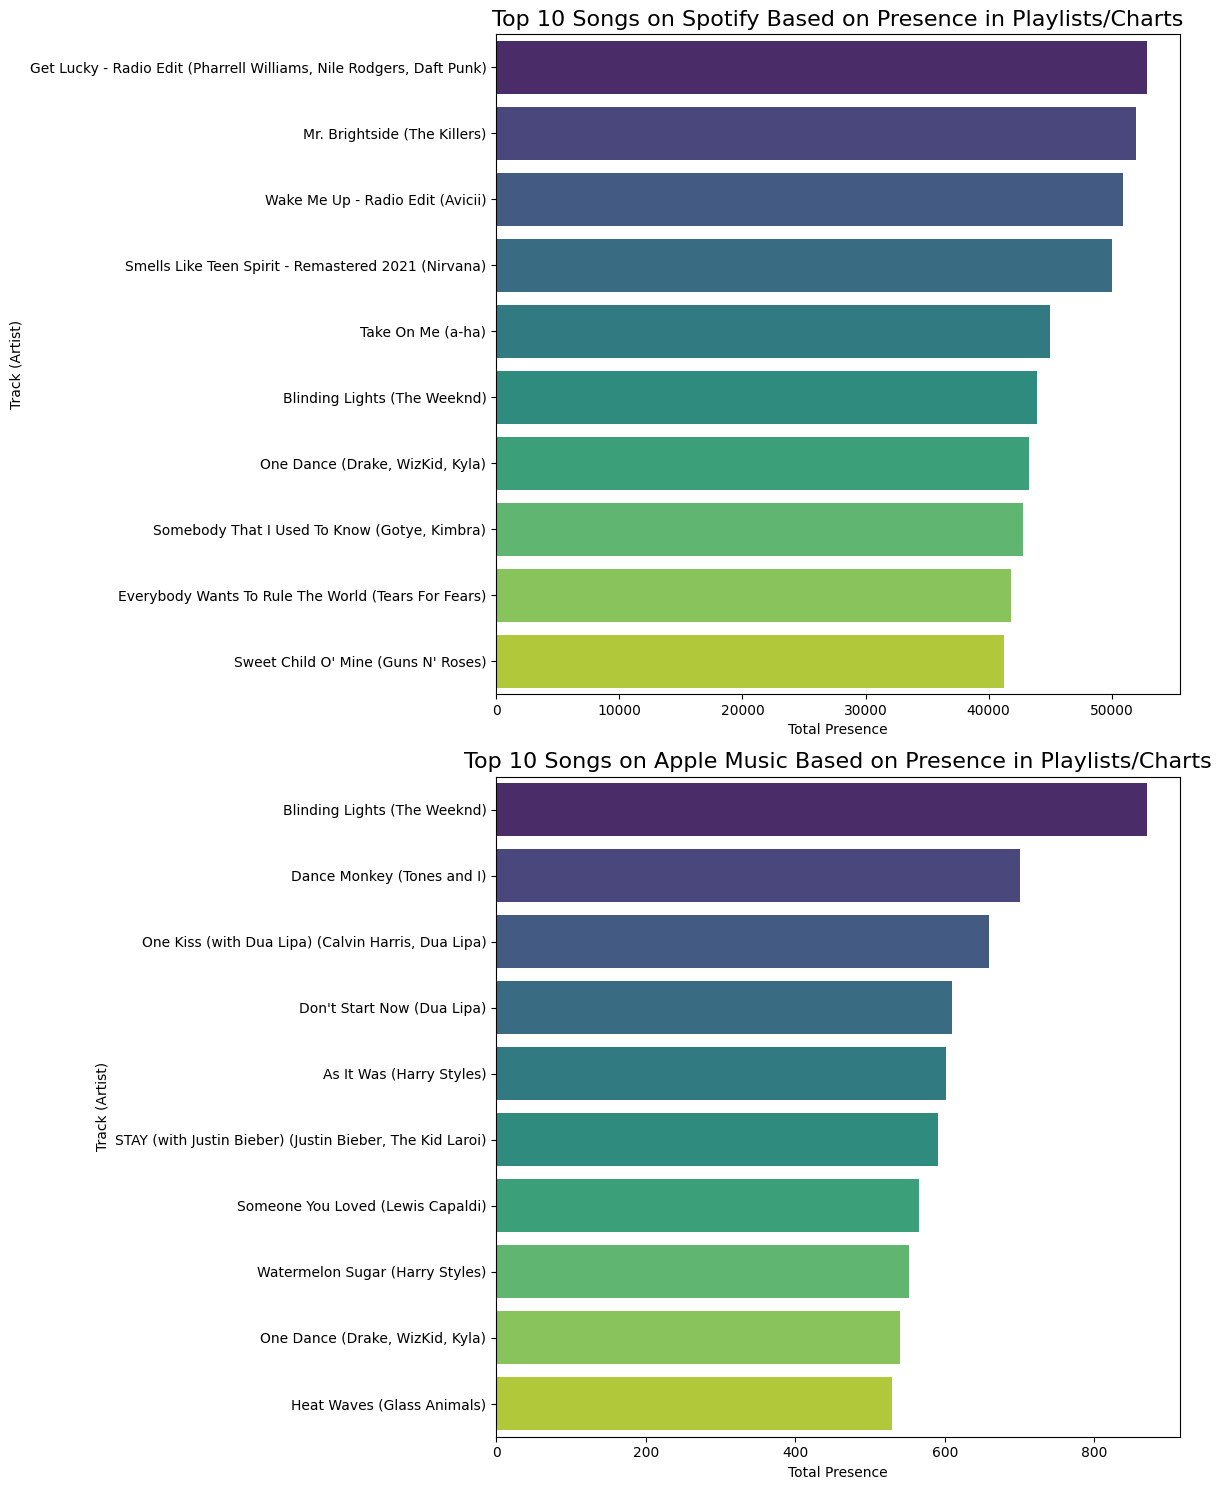

In [25]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 15))

# Plotting the top 10 songs for Spotify
sns.barplot(x=top_songs_spotify['spotify_total'], y=top_songs_spotify['track_name'] + " (" + top_songs_spotify['artist(s)_name'] + ")", 
            palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Songs on Spotify Based on Presence in Playlists/Charts', fontsize=16)
axes[0].set_xlabel('Total Presence')
axes[0].set_ylabel('Track (Artist)')

# Plotting the top 10 songs for Apple Music
sns.barplot(x=top_songs_apple['apple_total'], y=top_songs_apple['track_name'] + " (" + top_songs_apple['artist(s)_name'] + ")", 
            palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Songs on Apple Music Based on Presence in Playlists/Charts', fontsize=16)
axes[1].set_xlabel('Total Presence')
axes[1].set_ylabel('Track (Artist)')

plt.tight_layout()
plt.show()

# 10. Artists collaborations

In [26]:
""" # Identifying collaborations by splitting the 'artist(s)_name' column
spotify_data['artists_list'] = spotify_data['artist(s)_name'].str.split(', ')

# Filtering out songs that have only one artist to get collaborative tracks
collaborations = spotify_data[spotify_data['artists_list'].apply(len) > 1]

# Displaying the first few rows of the collaborations dataframe
collaborations[['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_spotify_charts']].head() """

" # Identifying collaborations by splitting the 'artist(s)_name' column\nspotify_data['artists_list'] = spotify_data['artist(s)_name'].str.split(', ')\n\n# Filtering out songs that have only one artist to get collaborative tracks\ncollaborations = spotify_data[spotify_data['artists_list'].apply(len) > 1]\n\n# Displaying the first few rows of the collaborations dataframe\ncollaborations[['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_spotify_charts']].head() "

In [27]:
""" # Function to get all combinations of artists for each track
def get_artist_combinations(artists_list):
    return list(combinations(sorted(artists_list), 2))

# Apply the function to the 'artists_list' column to get all artist combinations
collaborations['artist_combinations'] = collaborations['artists_list'].apply(get_artist_combinations)

# Flatten the list of artist combinations to count the frequency of each combination
all_combinations = [combo for sublist in collaborations['artist_combinations'] for combo in sublist]
frequent_collaborators = pd.Series(all_combinations).value_counts().head(10)

# Plotting the top 10 frequent collaborator pairs
plt.figure(figsize=(12, 8))
sns.barplot(x=frequent_collaborators.values, y=frequent_collaborators.index, palette="viridis")
plt.title('Top 10 Frequent Collaborator Pairs', fontsize=16)
plt.xlabel('Number of Collaborations')
plt.ylabel('Artist Pairs')
plt.tight_layout()
plt.show() """

' # Function to get all combinations of artists for each track\ndef get_artist_combinations(artists_list):\n    return list(combinations(sorted(artists_list), 2))\n\n# Apply the function to the \'artists_list\' column to get all artist combinations\ncollaborations[\'artist_combinations\'] = collaborations[\'artists_list\'].apply(get_artist_combinations)\n\n# Flatten the list of artist combinations to count the frequency of each combination\nall_combinations = [combo for sublist in collaborations[\'artist_combinations\'] for combo in sublist]\nfrequent_collaborators = pd.Series(all_combinations).value_counts().head(10)\n\n# Plotting the top 10 frequent collaborator pairs\nplt.figure(figsize=(12, 8))\nsns.barplot(x=frequent_collaborators.values, y=frequent_collaborators.index, palette="viridis")\nplt.title(\'Top 10 Frequent Collaborator Pairs\', fontsize=16)\nplt.xlabel(\'Number of Collaborations\')\nplt.ylabel(\'Artist Pairs\')\nplt.tight_layout()\nplt.show() '

In [28]:
""" # Calculating average streams and presence in playlists for collaborative tracks
collab_avg_streams = collaborations['streams'].mean()

# Calculating average streams and presence in playlists for all tracks
overall_avg_streams = spotify_data['streams'].mean()

# Creating a DataFrame to visualize the comparison
data = {
    'Metrics': ['Average Streams'],
    'Collaborations': [collab_avg_streams],
    'Overall': [overall_avg_streams]
}
comparison_df = pd.DataFrame(data).melt(id_vars=['Metrics'], value_vars=['Collaborations', 'Overall'])

# Plotting the comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Metrics', y='value', hue='variable', data=comparison_df, palette="viridis")
plt.title('Comparison of Streams: Collaborations vs. Overall', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='')
plt.tight_layout()
plt.show()
 """

' # Calculating average streams and presence in playlists for collaborative tracks\ncollab_avg_streams = collaborations[\'streams\'].mean()\n\n# Calculating average streams and presence in playlists for all tracks\noverall_avg_streams = spotify_data[\'streams\'].mean()\n\n# Creating a DataFrame to visualize the comparison\ndata = {\n    \'Metrics\': [\'Average Streams\'],\n    \'Collaborations\': [collab_avg_streams],\n    \'Overall\': [overall_avg_streams]\n}\ncomparison_df = pd.DataFrame(data).melt(id_vars=[\'Metrics\'], value_vars=[\'Collaborations\', \'Overall\'])\n\n# Plotting the comparison\nplt.figure(figsize=(12, 7))\nsns.barplot(x=\'Metrics\', y=\'value\', hue=\'variable\', data=comparison_df, palette="viridis")\nplt.title(\'Comparison of Streams: Collaborations vs. Overall\', fontsize=16)\nplt.xlabel(\'\')\nplt.ylabel(\'\')\nplt.legend(title=\'\')\nplt.tight_layout()\nplt.show()\n '

In [29]:
""" # Recalculating the average Spotify presence for collaborative tracks and overall tracks
collab_avg_spotify_presence = (collaborations['in_spotify_playlists'] + collaborations['in_spotify_charts']).mean()
overall_avg_spotify_presence = (spotify_data['in_spotify_playlists'] + spotify_data['in_spotify_charts']).mean()

# Plotting the comparison for Average Spotify Presence
labels = ['Collaborations', 'Overall']
values = [collab_avg_spotify_presence, overall_avg_spotify_presence]

plt.figure(figsize=(10, 7))
sns.barplot(x=labels, y=values, palette="viridis")
plt.title('Average Spotify Presence: Collaborations vs. Overall', fontsize=16)
plt.ylabel('Average Presence')
plt.tight_layout()
plt.show() """

' # Recalculating the average Spotify presence for collaborative tracks and overall tracks\ncollab_avg_spotify_presence = (collaborations[\'in_spotify_playlists\'] + collaborations[\'in_spotify_charts\']).mean()\noverall_avg_spotify_presence = (spotify_data[\'in_spotify_playlists\'] + spotify_data[\'in_spotify_charts\']).mean()\n\n# Plotting the comparison for Average Spotify Presence\nlabels = [\'Collaborations\', \'Overall\']\nvalues = [collab_avg_spotify_presence, overall_avg_spotify_presence]\n\nplt.figure(figsize=(10, 7))\nsns.barplot(x=labels, y=values, palette="viridis")\nplt.title(\'Average Spotify Presence: Collaborations vs. Overall\', fontsize=16)\nplt.ylabel(\'Average Presence\')\nplt.tight_layout()\nplt.show() '